# Linear Regression

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import os

In [4]:
# Prepare directories and paths
dir_here = os.path.abspath("")
dir_base = os.path.dirname(dir_here)
dir_data = os.path.join(dir_base, "data")
path_data_csv = os.path.join(dir_data, "student-mat.csv")

In [5]:
# Read data
data = pd.read_csv(path_data_csv, sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [6]:
# Filter the data that interests me
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


## Some Nomenclature

***Atributes*** are the different variables, i.e. the fields or names of the columns in the dataframe.

Strictly speaking the variable to predict is not an attribute, and will have to be dropped from the dataframe.

We are going to predict the variable 'G3'. 

## Data preparation

### Select the variable to predict

In [7]:
predict = "G3"
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])
print("x:")
print(x)
print("---")
print("y:")
print(y)

x:
[[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 ...
 [10  8  1  3  3]
 [11 12  1  0  0]
 [ 8  9  1  0  5]]
---
y:
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12


In [8]:
print(x.shape)
print("---")
print(y.shape)

(395, 5)
---
(395,)


### Split the data between train and select batches

In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [10]:
print(x_train)
print("---")
print(y_train)

[[13 11  2  0  2]
 [ 5  5  2  0 12]
 [ 5  5  2  0  4]
 ...
 [ 9  9  2  0  8]
 [10  8  1  3  3]
 [15 15  2  0  2]]
---
[11  5  6 10  6 19 12  9 11  8  8 10 10  9 11  0 13 11 15  0  8 12 14 13
 10  9 11 11  0  9  9  6 10 14  8 15 11 10 11 16 10 14 16  8 14  0 13 10
 17  8 15  5 16  9  8 15 14 15  7 15 11 18  8  0 11  6 12 11 12  0 16 11
 14 11  8 10 12  9  8 10 15 11 10  8 13 11 17 15  9  5 11 15 10  9 11 14
  9 15  8 16 10  7 10  0  9 10  9 12  9  6 14  7 10 13 20 14 12 10 11 13
 19  0 11  0 11  8 12 13 10  6 12  9 18  0 12  9  0  6  0 13 13 14  0 13
 10 14 15  6 15 15  5 19 13  8 12 10 11  0 11  5  0 10 10 11 15  6 10 16
 12 11 10 13 16 14 19  7  5 13 10 14 12 11 13 10 11  0 11 11 10 10 11 11
 14 16 15 11 11  6 10  0  8  7  8  9 15 11 13 11 15 17 18 15 10 15 12 11
  0 10 14 10 14 12 15 11 12 10 13 15  0 11 11 16 13 16 16  0 12 14 10 14
 15  0  0 13 16 12  8  8  0 15 12 14 13  8 18 18  8  0 14 10  0 15  6 10
 17  0 10 15 10  8  0  9 12  0  9 12 10 10 13 12 11 18  8  9  0 13 18  0
  9  0

In [11]:
print(x_train.shape)
print("---")
print(y_train.shape)

(355, 5)
---
(355,)


### Create a linear regression model

In [12]:
# Create linear regression object
linear = sklearn.linear_model.LinearRegression()

In [13]:
# Fit linear regression to the train data
linear.fit(x_train, y_train) 
# The fit is stored in the linear object already created

LinearRegression()

In [14]:
# Check accuracy with the test data
acc = linear.score(x_test, y_test)
print(acc)

0.6929428623318563


We get a 79% accuracy.

For the case that's decent enough.

### Check the linear regression

In [15]:
# Check the coefficients
print(f"Coefficients: {linear.coef_}")
print(f"Intercept: {linear.intercept_}")

Coefficients: [ 0.14510036  0.98492773 -0.06869029 -0.30523176  0.04444633]
Intercept: -1.7253503324107484


In [16]:
# Check some predictions made by the model
predictions = linear.predict(x_test)
for k in range(len(predictions)):
    print(f"{y_test[k]:02d} ; {predictions[k]:06.3f} ; {x_test[k]}")

00 ; 09.224 ; [ 9 10  3  0  0]
10 ; 10.786 ; [11 11  4  0  8]
10 ; 09.114 ; [10 10  3  2  8]
11 ; 12.086 ; [11 12  2  0 12]
10 ; 09.438 ; [10 10  2  0  0]
10 ; 08.308 ; [9 9 2 0 0]
11 ; 11.855 ; [12 12  1  0  2]
16 ; 16.614 ; [16 16  4  0 12]
08 ; 05.632 ; [8 7 2 3 8]
12 ; 11.626 ; [13 12  2  1  2]
10 ; 08.587 ; [8 9 1 0 8]
06 ; 04.312 ; [6 5 1 0 7]
18 ; 16.093 ; [15 16  3  0  2]
10 ; 10.568 ; [11 11  2  0  0]
09 ; 11.786 ; [10  9  2  0 75]
00 ; -0.992 ; [6 0 2 0 0]
14 ; 11.855 ; [12 12  1  0  2]
08 ; 08.251 ; [8 9 2 0 2]
06 ; 05.931 ; [ 7  6  1  0 18]
08 ; 06.249 ; [7 7 1 0 3]
06 ; 07.138 ; [ 9  7  2  0 18]
19 ; 19.976 ; [18 19  1  0 10]
09 ; 08.453 ; [8 9 1 0 5]
10 ; 08.574 ; [9 9 2 0 6]
11 ; 10.083 ; [12 10  2  0  8]
11 ; 07.803 ; [10  8  1  0  6]
12 ; 10.277 ; [ 9 11  2  0  0]
07 ; 07.729 ; [ 9  8  2  1 16]
09 ; 07.981 ; [10  8  1  0 10]
09 ; 09.323 ; [10  9  3  1 28]
11 ; 09.692 ; [11 10  3  0  4]
12 ; 12.800 ; [13 12  1  0 20]
11 ; 11.145 ; [13 11  3  0  8]
00 ; 08.315 ; [10  9  

# Saving Models and Plotting Data

## Save the model with Pickle

In [29]:
import pickle # standard Python module to save objects

In [18]:
with open("studentmodel.pickle", "wb") as fid:
    pickle.dump(linear, fid)

In [19]:
# Now we can retrieve the model
pickle_in = open("studentmodel.pickle", "rb")
linear_2 = pickle.load(pickle_in)
# Check the coefficients
print(f"Coefficients: {linear.coef_}")
print(f"Intercept: {linear.intercept_}")

Coefficients: [ 0.14510036  0.98492773 -0.06869029 -0.30523176  0.04444633]
Intercept: -1.7253503324107484


It's the same model as before

## Train several models and keep the best

In [20]:
def train_linear_model(x,y):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    linear = sklearn.linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    return linear, acc

In [28]:
# Train N models and keep the best
N = 1000
max_acc = 0
for _ in range(N):
    _linear, _acc = train_linear_model(x,y)
    if _acc > max_acc:
        linear_3 = _linear
        acc_3 = _acc
print("Best model accuracy: ", acc_3)
print("... saving model to file 'studentmodel.pickle'")
with open("studentmodel.pickle", "wb") as fid:
    pickle.dump(linear_3, fid)


Best model accuracy:  0.9075026041804589
... saving model to file 'studentmodel.pickle'


## Plotting

In [32]:
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

In [33]:
style.use("ggplot")

Text(0.5, 1.0, 'Final Grade vs G1')

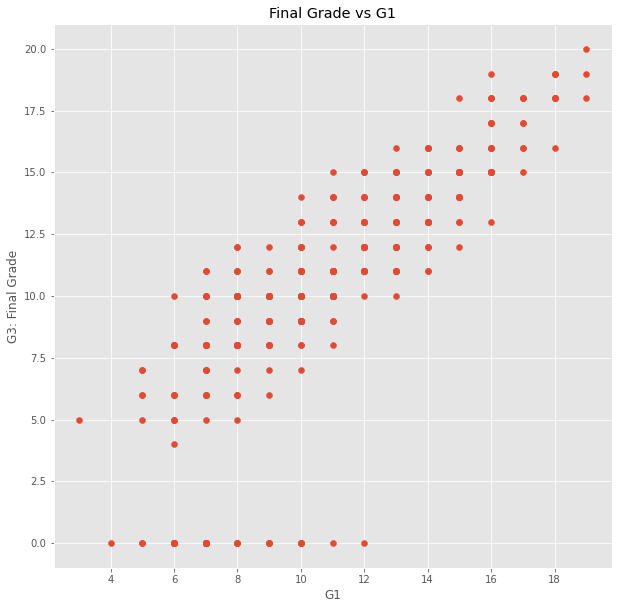

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
p = 'G1'
ax.scatter(data[p], data['G3'])
ax.set_xlabel(p)
ax.set_ylabel('G3: Final Grade')
ax.set_title('Final Grade vs G1')

Text(0.5, 1.0, 'Final Grade vs G2')

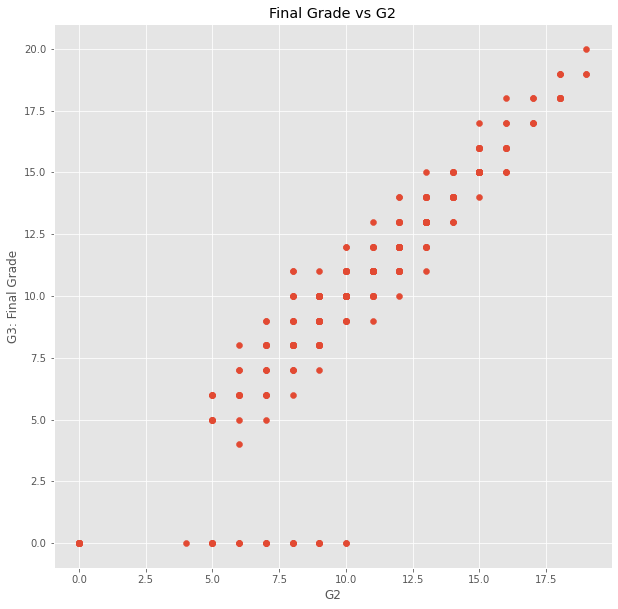

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
p = 'G2'
ax.scatter(data[p], data['G3'])
ax.set_xlabel(p)
ax.set_ylabel('G3: Final Grade')
ax.set_title(f'Final Grade vs {p}')

Text(0.5, 1.0, 'Final Grade vs studytime')

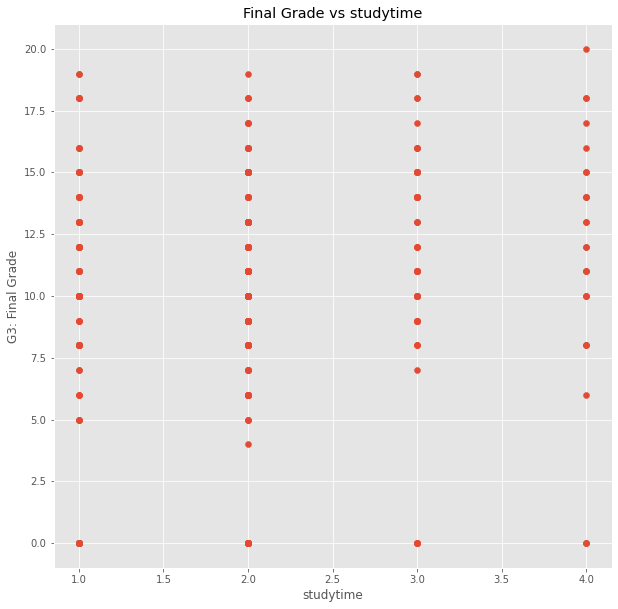

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
p = 'studytime'
ax.scatter(data[p], data['G3'])
ax.set_xlabel(p)
ax.set_ylabel('G3: Final Grade')
ax.set_title(f'Final Grade vs {p}')

Text(0.5, 1.0, 'Final Grade vs failures')

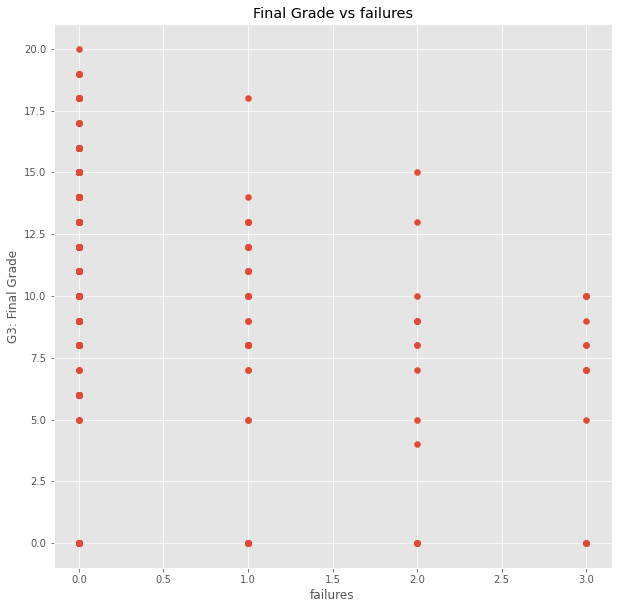

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
p = 'failures'
ax.scatter(data[p], data['G3'])
ax.set_xlabel(p)
ax.set_ylabel('G3: Final Grade')
ax.set_title(f'Final Grade vs {p}')

Text(0.5, 1.0, 'Final Grade vs absences')

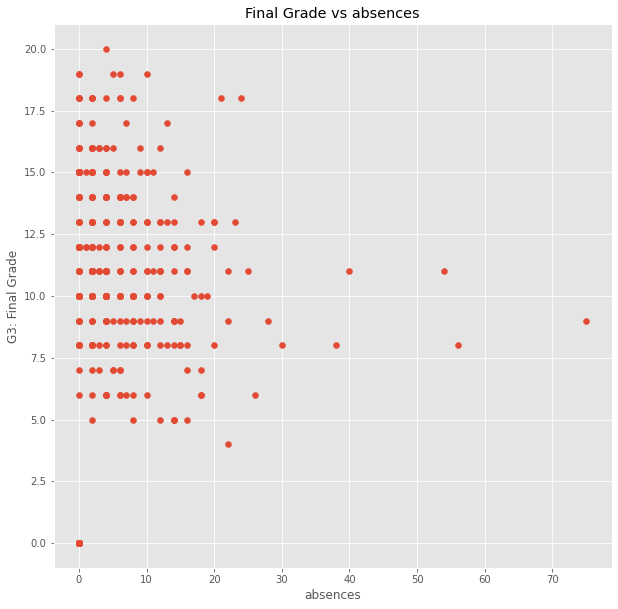

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
p = 'absences'
ax.scatter(data[p], data['G3'])
ax.set_xlabel(p)
ax.set_ylabel('G3: Final Grade')
ax.set_title(f'Final Grade vs {p}')

## Try with seaborn

In [44]:
import seaborn as sns

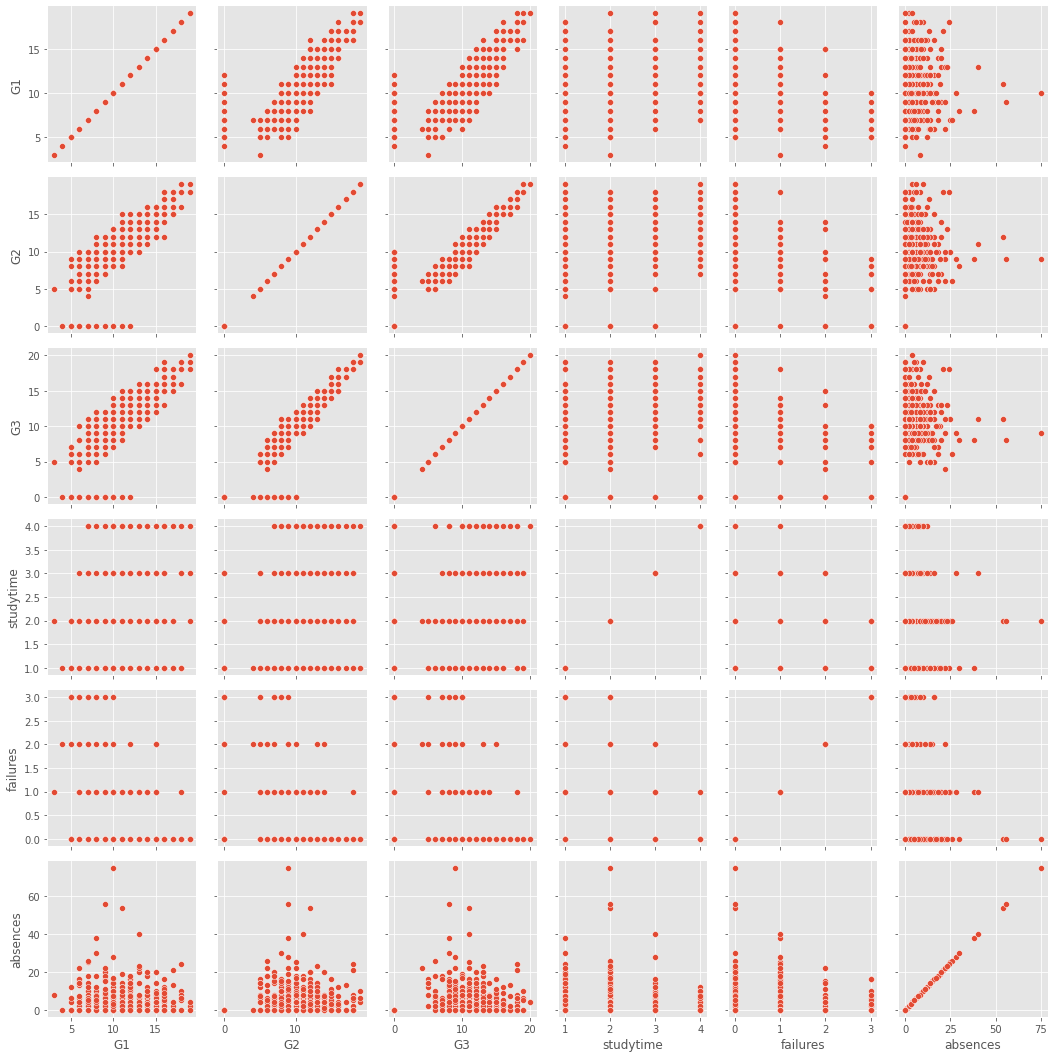

In [45]:
g = sns.PairGrid(data)
g.map(sns.scatterplot)

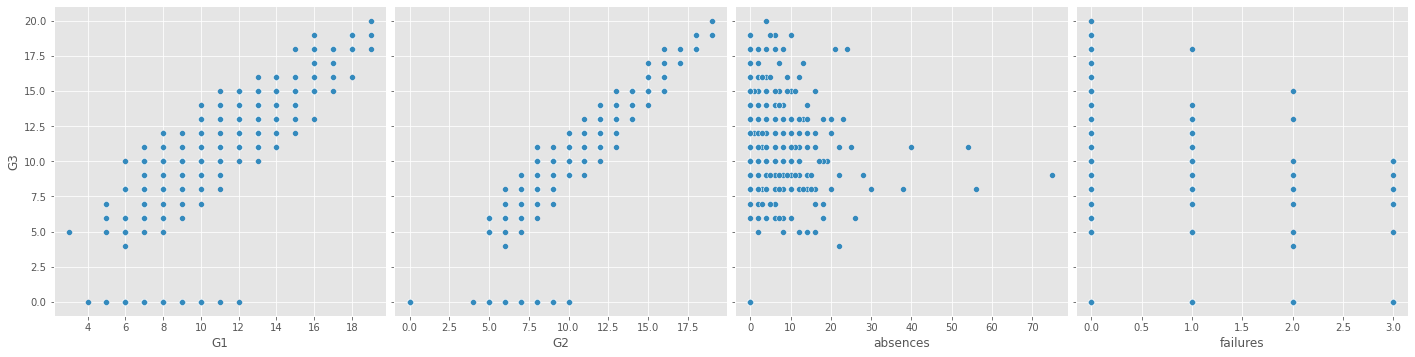

In [49]:
# Again
g = sns.pairplot(data=data, x_vars=["G1", "G2", "absences", "failures"], y_vars=["G3"], height=5)
g.map(sns.scatterplot)